<a href="https://colab.research.google.com/github/awuung/Machine-Learning/blob/main/Tugas3_Nama_PMB1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Awang Pratama Putra Mulya

Nim: 24060122120039

dataset: Pokemon.csv

# Tugas 3

In [1]:
# Import library dasar
import pylab
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns
from collections import Counter

# Import library untuk clustering dan visualisasi
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial import distance_matrix
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score

# Import library untuk reduksi dimensi dan dataset
from sklearn import manifold
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs

In [2]:
# Baca dataset
file_path = '/content/Pokemon.csv'  # Path ke file yang Anda unggah
dataset = pd.read_csv(file_path)

# Tampilkan beberapa baris pertama untuk melihat struktur data
print("Data awal:\n", dataset.head())

# Preprocessing: pilih fitur numerik
numeric_features = dataset.select_dtypes(include=['float64', 'int64']).columns
print("Fitur numerik:\n", numeric_features)

# Ekstrak data numerik
X = dataset[numeric_features]

# Standardisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Konversi hasil kembali ke DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_features)

# Tampilkan hasil standardisasi
print("Data setelah standardisasi:\n", X_scaled_df.head())


Data awal:
    #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
0  1              Bulbasaur  Grass  Poison    318  45      49       49   
1  2                Ivysaur  Grass  Poison    405  60      62       63   
2  3               Venusaur  Grass  Poison    525  80      82       83   
3  3  VenusaurMega Venusaur  Grass  Poison    625  80     100      123   
4  4             Charmander   Fire     NaN    309  39      52       43   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0       65       65     45           1      False  
1       80       80     60           1      False  
2      100      100     80           1      False  
3      122      120     80           1      False  
4       60       50     65           1      False  
Fitur numerik:
 Index(['#', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed',
       'Generation'],
      dtype='object')
Data setelah standardisasi:
           #     Total        HP    Attack   Defense   Sp. Atk  

##1. Teknik Agglomerative untuk Dataset Random

#### Generate Random Data menggunakan make_blobs

In [4]:
# Fungsi untuk membuat dendrogram
def plot_dendrogram(linkage_matrix, title):
    plt.figure(figsize=(10, 7))
    dendrogram(linkage_matrix)
    plt.title(title)
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')
    plt.show()

In [5]:
# Generate Random Data
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2,-1], [1,1], [10,4]], cluster_std=0.9)


In [6]:
# Menampilkan dimensi generate data
print("Dimensi data yang di-generate:", X1.shape)


Dimensi data yang di-generate: (50, 2)


#### Plotting Random Data

Menghasilkan output yang membagi data menjadi beberapa kelompok

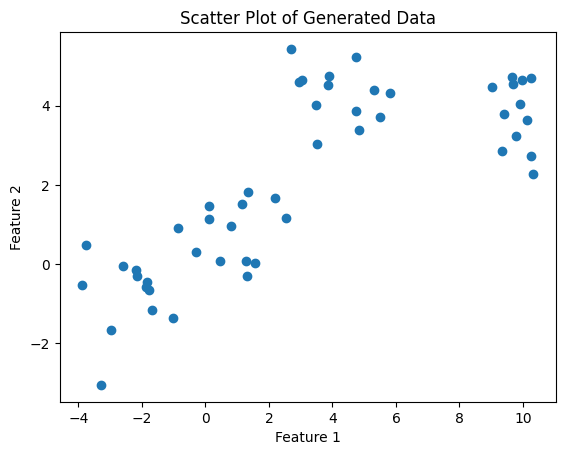

In [7]:
# Plotting Random Data
plt.scatter(X1[:, 0], X1[:, 1], marker='o')
plt.title('Scatter Plot of Generated Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

#### Agglomerative Clustering

Kelas Agglomerative Clustering akan membutuhkan dua masukan yaitu n_clusters dan linkage

In [8]:
# Inisialisasi objek AgglomerativeClustering
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'single')

# Melatih model pengelompokan pada dataset
agglom.fit(X1,y1)

AgglomerativeClustering(linkage='single', n_clusters=4)

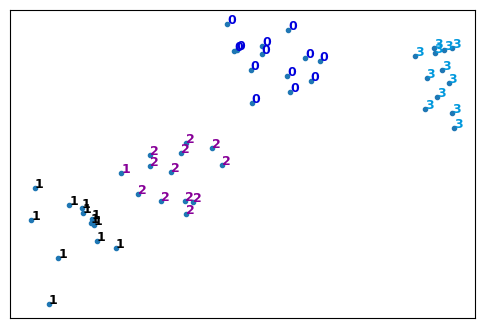

In [9]:
# Membuat figure dengan ukuran 6, 4
plt.figure(figsize=(6, 4))

# Membuat minimum dan maximum range dari X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Mencari rata-rata dari jarak X1.
X1 = (X1 - x_min) / (x_max - x_min)

# Looping untuk mendisplay semua datapoints.
for i in range(X1.shape[0]):
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})

# Hapus x ticks, y ticks, x dan y axis (garis koordinat)
plt.xticks([])
plt.yticks([])

# Menampilkan plot dari data asli sebelum dicluster
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Menampilkan plot
plt.show()


#### Plotting Dendogram (Mencari Jarak)
Plotting Dendogram akan digunakan untuk menentukan jarak antara titik ke titik lain dari sebuah dataset random (X1) yang sudah kita inisialisasi.

In [10]:
# Menghitung matriks jarak antara dua set data
dist_matrix = distance_matrix(X1,X1)

# Mencetak hasil matriks jarak
print(dist_matrix)

[[0.         0.09617697 0.70365984 ... 0.57618311 0.92371333 0.93694127]
 [0.09617697 0.         0.67799509 ... 0.52289678 0.88964903 0.90944037]
 [0.70365984 0.67799509 0.         ... 0.2405689  0.22811175 0.2332934 ]
 ...
 [0.57618311 0.52289678 0.2405689  ... 0.         0.39133796 0.4296267 ]
 [0.92371333 0.88964903 0.22811175 ... 0.39133796 0.         0.06793921]
 [0.93694127 0.90944037 0.2332934  ... 0.4296267  0.06793921 0.        ]]


In [11]:
# Memberikan parameter pada kelas linkage dari hierarki
X = hierarchy.linkage(dist_matrix, 'single')
Y = hierarchy.linkage(dist_matrix, 'average')
Z = hierarchy.linkage(dist_matrix, 'complete')

<ipython-input-11-cc9c708ec4ba>:2: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  X = hierarchy.linkage(dist_matrix, 'single')
<ipython-input-11-cc9c708ec4ba>:3: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Y = hierarchy.linkage(dist_matrix, 'average')
<ipython-input-11-cc9c708ec4ba>:4: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'complete')


Text(0.5, 1.0, 'Single Linkage')

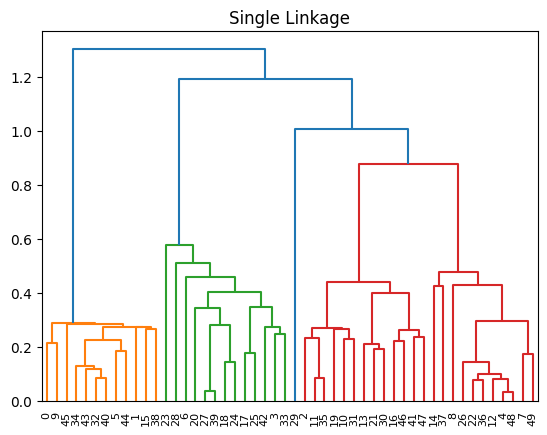

In [12]:
# Single Linkage
dendroX = hierarchy.dendrogram(X)
plt.title("Single Linkage")

Text(0.5, 1.0, 'Average Linkage')

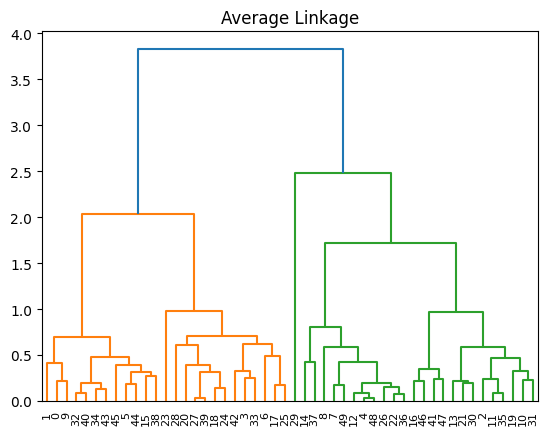

In [13]:
# Average Linkage
dendroY = hierarchy.dendrogram(Y)
plt.title("Average Linkage")

Text(0.5, 1.0, 'Complete Linkage')

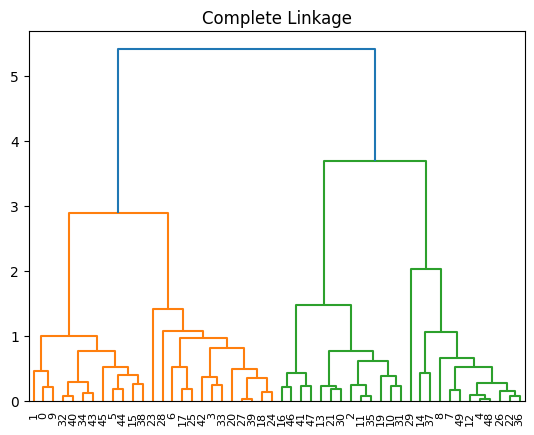

In [14]:
# Complete Linkage
dendroZ = hierarchy.dendrogram(Z)
plt.title("Complete Linkage")

## 2. Teknik Agglomerative untuk Cars Clustering

#### Read Data

In [20]:
# Membaca dataset dengan library panda
pdf = pd.read_csv("/content/cars_clus.csv")

In [21]:
# Menampilkan dimensi dataset
pdf.shape

(159, 16)

In [22]:
# Menampilkan 10 data teratas
pdf.head(10)

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0
5,Audi,A6,18.780,23.555,0.000,33.950,2.800,200.000,108.700,76.100,192.000,3.561,18.500,22.000,2.933,0.0
6,Audi,A8,1.380,39.000,0.000,62.000,4.200,310.000,113.000,74.000,198.200,3.902,23.700,21.000,0.322,0.0
7,BMW,323i,19.747,$null$,0.000,26.990,2.500,170.000,107.300,68.400,176.000,3.179,16.600,26.100,2.983,0.0
8,BMW,328i,9.231,28.675,0.000,33.400,2.800,193.000,107.300,68.500,176.000,3.197,16.600,24.000,2.223,0.0
9,BMW,528i,17.527,36.125,0.000,38.900,2.800,193.000,111.400,70.900,188.000,3.472,18.500,24.800,2.864,0.0


#### Data Cleaning
Melakukan data cleaning dengan membuang baris yang memiliki nilai null.

In [23]:
# Mencetak dimensi dataset sebelum proses pembersihan
print("Dimensi dataset sebelum cleaning:", pdf.size)

# Mengubah kolom tertentu menjadi tipe data numerik, dan mengatasi nilai non-numerik dengan menggantinya menjadi NaN
pdf[['sales', 'resale', 'type','price','engine_s','horsepow','wheelbas','width',
      'length','curb_wgt','fuel_cap','mpg', 'lnsales']] = pdf[['sales', 'resale',
      'type','price','engine_s','horsepow','wheelbas','width','length','curb_wgt',
      'fuel_cap','mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')

# Menghapus baris yang mengandung nilai NaN
pdf = pdf.dropna()
# Mengatur ulang indeks setelah penghapusan baris
pdf = pdf.reset_index(drop=True)
# Mencetak dimensi dataset setelah proses pembersihan
print("Ukuran pdf setelah cleaning:", pdf.size)
# Menampilkan 10 baris pertama dari dataset yang telah dibersihkan
pdf.head(10)

Dimensi dataset sebelum cleaning: 2544
Ukuran pdf setelah cleaning: 1872


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.400,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,RL,8.588,29.725,0.0,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,Audi,A4,20.397,22.255,0.0,23.990,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,Audi,A6,18.780,23.555,0.0,33.950,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0
5,Audi,A8,1.380,39.000,0.0,62.000,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,0.322,0.0
6,BMW,328i,9.231,28.675,0.0,33.400,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,2.223,0.0
7,BMW,528i,17.527,36.125,0.0,38.900,2.8,193.0,111.4,70.9,188.0,3.472,18.5,24.8,2.864,0.0
8,Buick,Century,91.561,12.475,0.0,21.975,3.1,175.0,109.0,72.7,194.6,3.368,17.5,25.0,4.517,0.0
9,Buick,Regal,39.350,13.740,0.0,25.300,3.8,240.0,109.0,72.7,196.2,3.543,17.5,23.0,3.672,0.0


#### Features Selection

In [24]:
# Feature Selection
featureset = pdf[['engine_s', 'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]
featureset.head()

,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg
0,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0
1,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0
2,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0
3,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0
4,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0


In [26]:
# x berisikan nilai dari featureset yang nantinya akan digunakan untuk normalisasi
x = featureset.values

# Membuat objek MinMaxScaler
min_max_scaler = MinMaxScaler()

# Menggunakan fit_transform untuk mengubah nilai variabel dalam rentang 0 hingga 1
feature_mtx = min_max_scaler.fit_transform(x)

# Menampilkan lima baris pertama dari hasil normalisasi
feature_mtx[0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

#### A. Agglomerative Clustering with Scipy
Scipy digunakan untuk menghitung jarak antara cluster yang baru terbentuk.

In [27]:
# Mendapatkan jumlah baris (leng) dalam feature_mtx
leng = feature_mtx.shape[0]
# Inisialisasi matriks jarak D dengan nol
D = np.zeros([leng,leng])

# Menghitung jarak euclidean antara setiap pasangan data dalam feature_mtx
for i in range(leng):
  for j in range(leng):
    D[i,j] = scipy.spatial.distance.euclidean(feature_mtx[i], feature_mtx[j])

#### Complete Linkage

In [28]:
# Complete Linkage
Z = hierarchy.linkage(D, 'complete')

<ipython-input-28-1190c8367043>:2: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(D, 'complete')


In [29]:
# Menentukan jumlah cluster
from scipy.cluster.hierarchy import fcluster

# Mencetak informasi tentang metode linkage yang digunakan
print("Complete Linkage")
# Menentukan batas jarak maksimum (max_d) untuk membentuk cluster
max_d = 3
# Menggunakan fungsi fcluster untuk menentukan cluster
clusters = fcluster(Z, max_d, criterion='distance')
clusters

Complete Linkage


array([ 1,  5,  5,  6,  5,  4,  6,  5,  5,  5,  5,  5,  4,  4,  5,  1,  6,
        5,  5,  5,  4,  2, 11,  6,  6,  5,  6,  5,  1,  6,  6, 10,  9,  8,
        9,  3,  5,  1,  7,  6,  5,  3,  5,  3,  8,  7,  9,  2,  6,  6,  5,
        4,  2,  1,  6,  5,  2,  7,  5,  5,  5,  4,  4,  3,  2,  6,  6,  5,
        7,  4,  7,  6,  6,  5,  3,  5,  5,  6,  5,  4,  4,  1,  6,  5,  5,
        5,  6,  4,  5,  4,  1,  6,  5,  6,  6,  5,  5,  5,  7,  7,  7,  2,
        2,  1,  2,  6,  5,  1,  1,  1,  7,  8,  1,  1,  6,  1,  1],
      dtype=int32)

In [32]:
# Menentukan jumlah cluster
from scipy.cluster.hierarchy import fcluster

# Mencetak informasi tentang metode linkage yang digunakan
print("Complete Linkage")
# Menentukan jumlah klaster yang diinginkan (k)
k = 5
# Menggunakan fungsi fcluster untuk menentukan cluster
clusters = fcluster(Z, k, criterion = 'maxclust')
clusters

Complete Linkage


array([1, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 1, 3, 3, 3, 3, 2, 1,
       5, 3, 3, 3, 3, 3, 1, 3, 3, 4, 4, 4, 4, 2, 3, 1, 3, 3, 3, 2, 3, 2,
       4, 3, 4, 1, 3, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 2, 2, 2, 1, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 1, 3, 3, 3, 3, 3, 2,
       3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1,
       3, 4, 1, 1, 3, 1, 1], dtype=int32)

#### Plotting Dendogram Complete Linkage

Melakukan plotting dendogram terhadap model dan akan menampilkan lebih jelas dari hasil clustering yang sudah terbentuk.

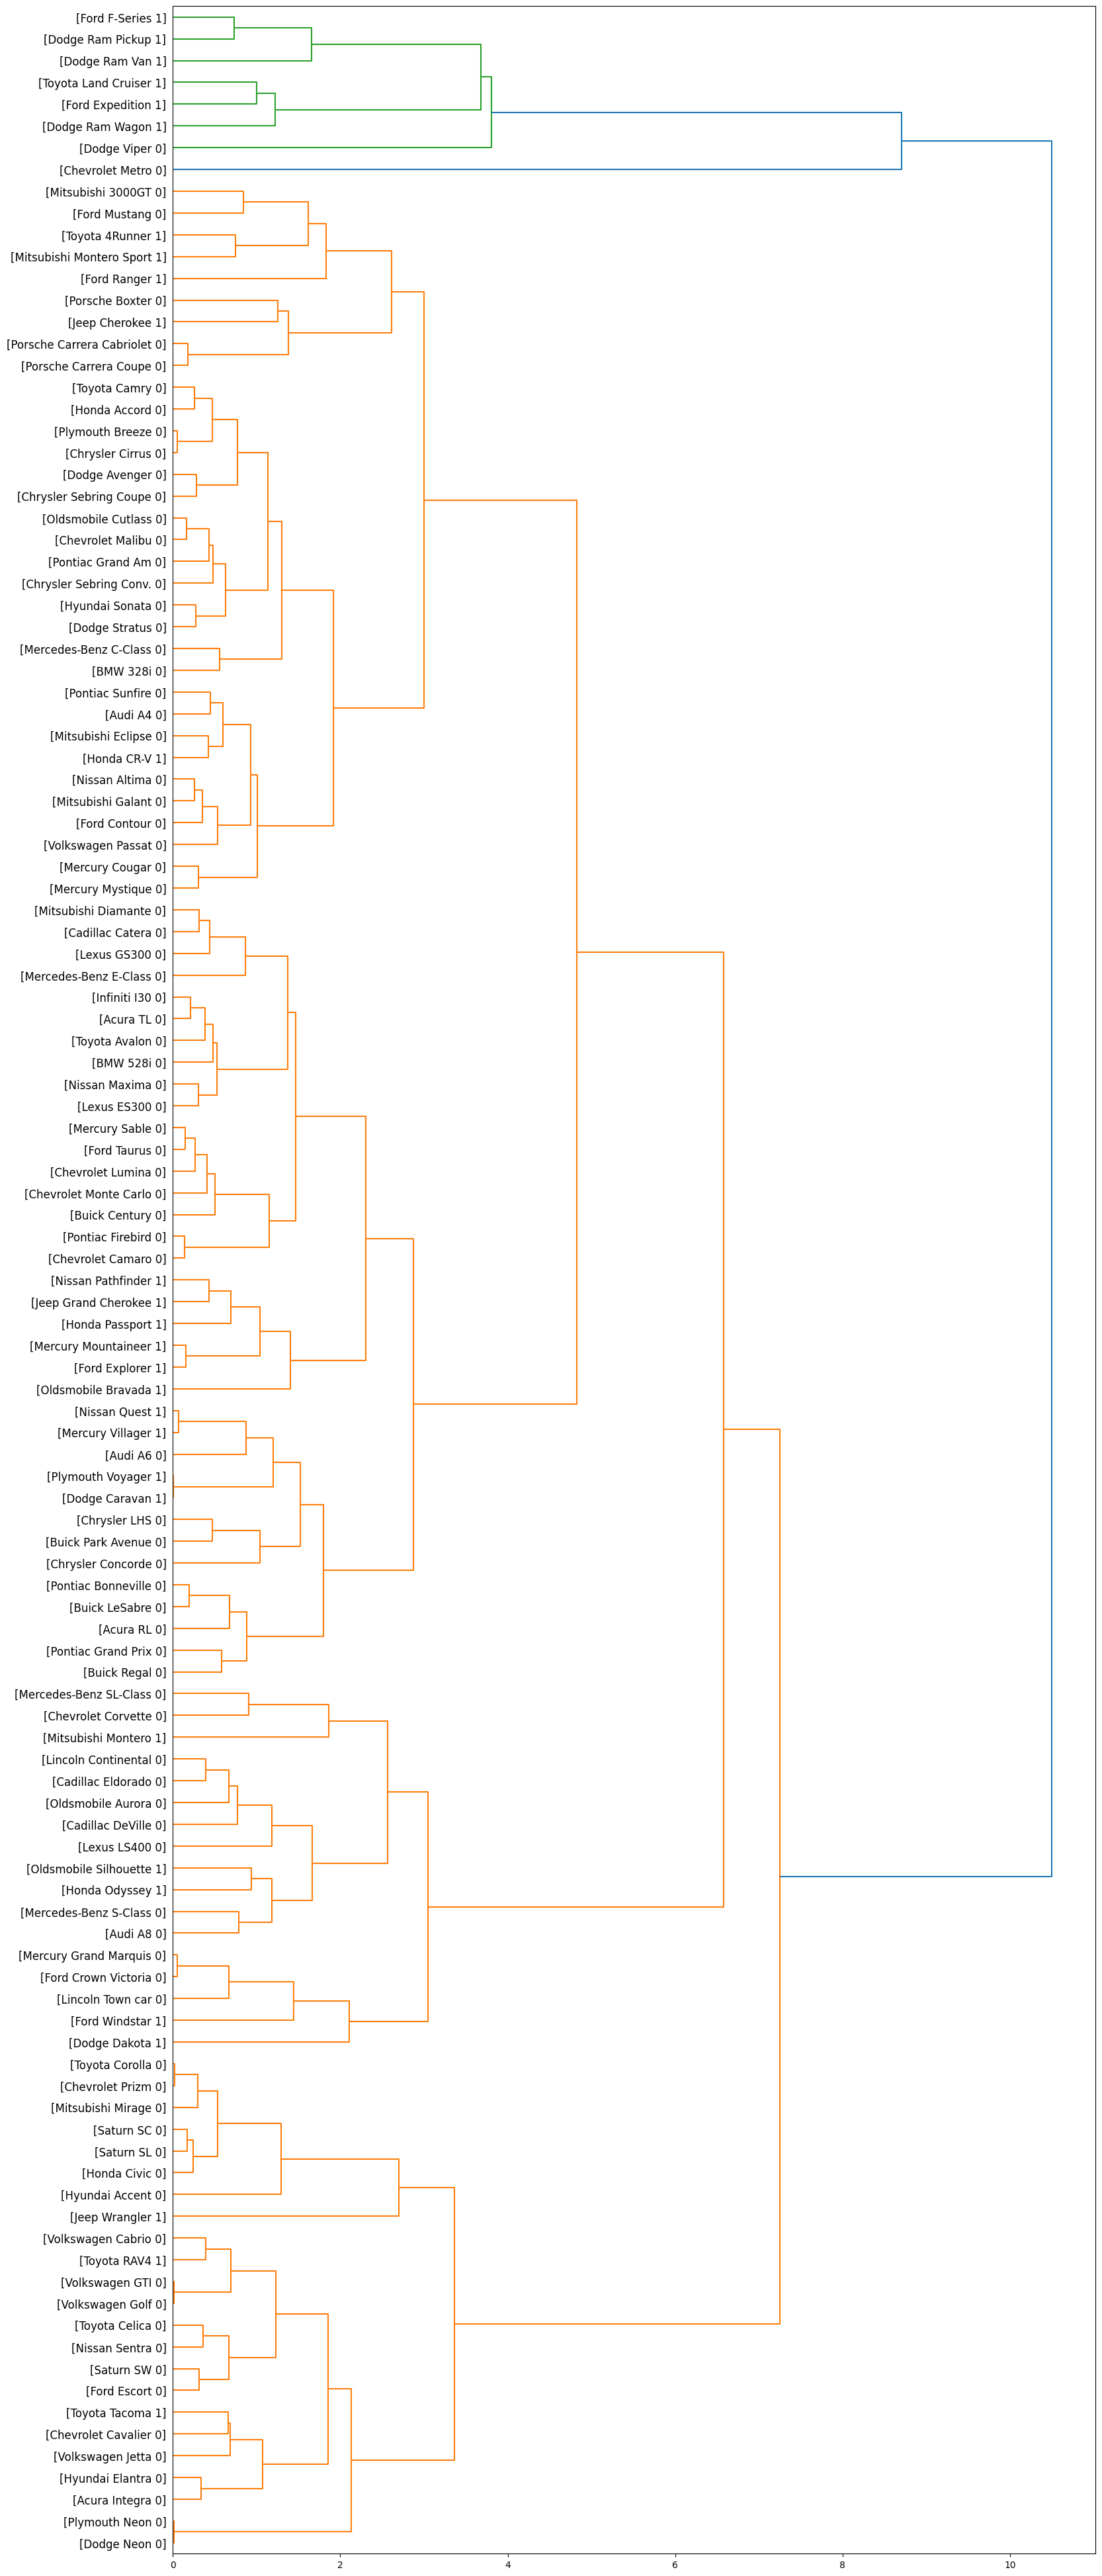

In [33]:
# Complete Dendogram

# Menentukan ukuran figure yang akan dibuat
fig = pylab.figure(figsize=(18,50))

# Fungsi untuk memberikan label pada leaf (daun) dendrogram
def llf(id):
  return '[%s %s %s]' % (pdf['manufact'][id], pdf['model'][id],
                         int(float(pdf['type'][id])))

# Membuat dendrogram
dendro = hierarchy.dendrogram(Z, leaf_label_func = llf,
                              leaf_rotation = 0, leaf_font_size = 12, orientation = 'right')

#### B. Agglomerative Clustering with Scikit Learn
Library scikit-learn digunakan untuk  mengelompokkan dataset, Agglomerative Clustering melakukan pengelompokan hierarkis menggunakan pendekatan bottom-up.
Berikut ini merupakan masukan untuk menampilkan matriks dari clustering yang akan dilakukan.

In [34]:
# Mencari jarak matrix
dist_matrix = distance_matrix(feature_mtx, feature_mtx)

# Mencetak matriks jarak yang dihasilkan
print(dist_matrix)

[[0.         0.57777143 0.75455727 ... 0.28530295 0.24917241 0.18879995]
 [0.57777143 0.         0.22798938 ... 0.36087756 0.66346677 0.62201282]
 [0.75455727 0.22798938 0.         ... 0.51727787 0.81786095 0.77930119]
 ...
 [0.28530295 0.36087756 0.51727787 ... 0.         0.41797928 0.35720492]
 [0.24917241 0.66346677 0.81786095 ... 0.41797928 0.         0.15212198]
 [0.18879995 0.62201282 0.77930119 ... 0.35720492 0.15212198 0.        ]]


In [35]:
# Complete Linkage
# Membuat objek dari kelas AgglomerativeClustering
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')

# Melakukan clustering
agglom.fit(feature_mtx)
agglom.labels_

array([1, 2, 2, 1, 2, 3, 1, 2, 2, 2, 2, 2, 3, 3, 2, 1, 1, 2, 2, 2, 5, 1,
       4, 1, 1, 2, 1, 2, 1, 1, 1, 5, 0, 0, 0, 3, 2, 1, 2, 1, 2, 3, 2, 3,
       0, 3, 0, 1, 1, 1, 2, 3, 1, 1, 1, 2, 1, 1, 2, 2, 2, 3, 3, 3, 1, 1,
       1, 2, 1, 2, 2, 1, 1, 2, 3, 2, 3, 1, 2, 3, 5, 1, 1, 2, 3, 2, 1, 3,
       2, 3, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 0, 1, 1, 1, 1, 1])

In [36]:
# Menambahkan kolom baru bernama 'cluster_' ke dalam DataFrame pdf
pdf['cluster_'] = agglom.labels_

# Menampilkan lima baris pertama
pdf.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,1
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,2
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,2
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,1
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,2


#### Plotting dengan scatter plot

<ipython-input-37-09f7eebf4f10>:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)


Text(0, 0.5, 'mpg')

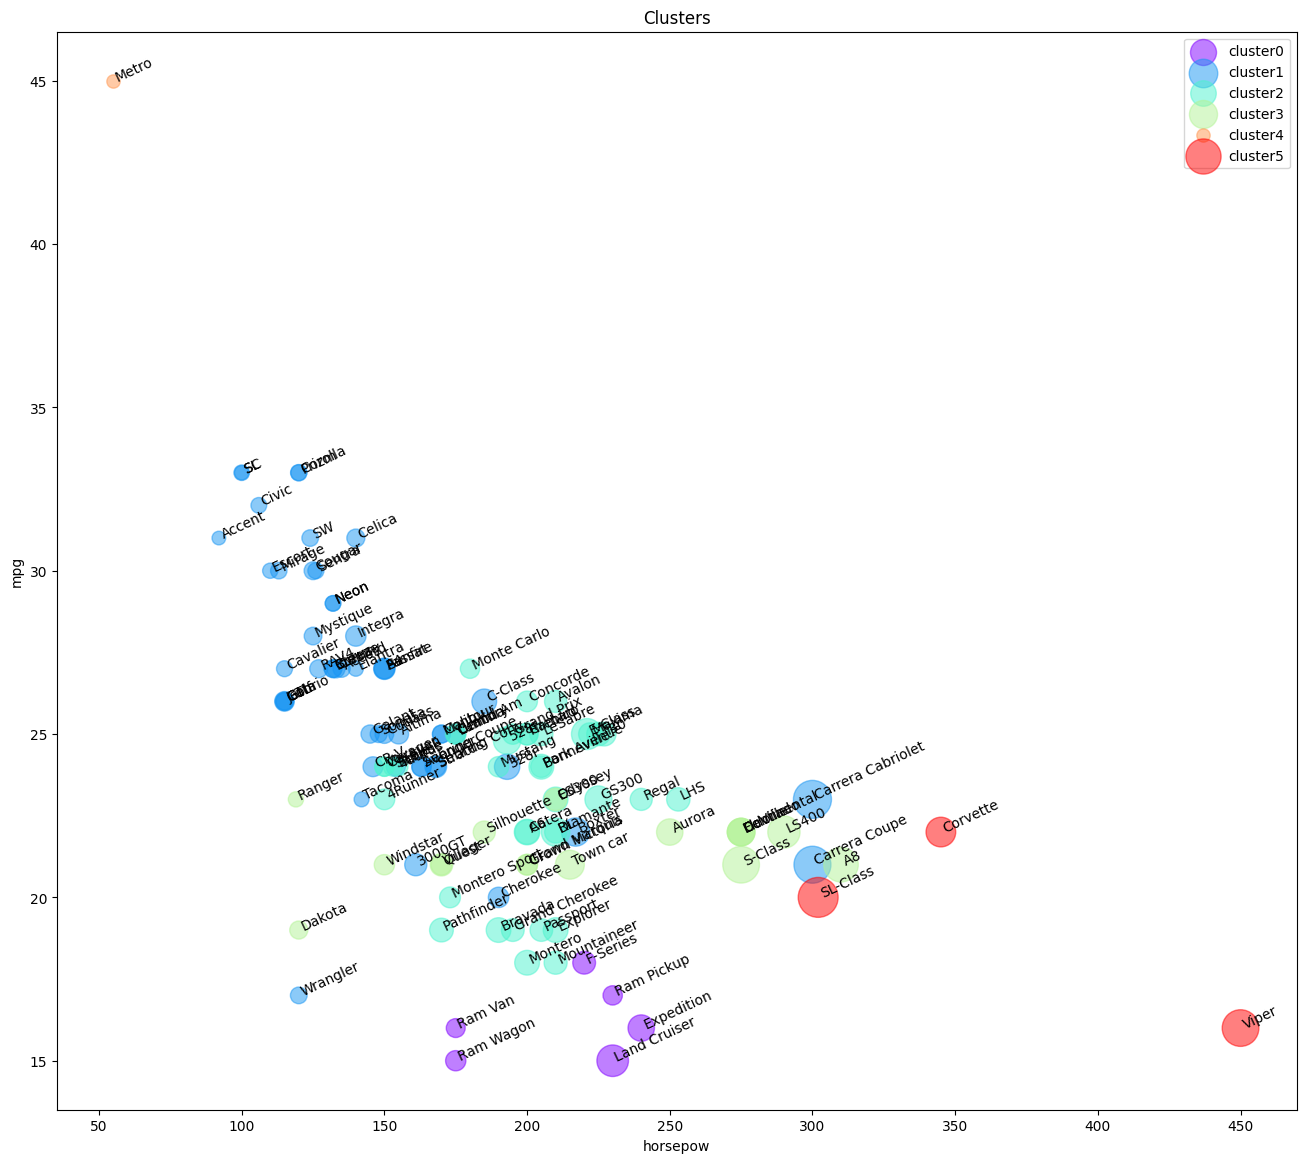

In [37]:
# Inisialisasi Warna dan Label Klaster
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
# Membuat daftar label klaster.
cluster_labels = list(range(0, n_clusters))

# Membuat gambar dengan ukuran 6x4 inch
plt.figure(figsize=(16,14))

# Visualisasi Setiap Klaster
for color, label in zip(colors, cluster_labels):
  subset = pdf[pdf.cluster_ == label]
  for i in subset.index:
          plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25)
  plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)

# Penyusunan Legenda dan Label Grafik
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

In [38]:
# Menghitung tipe di setiap cluster
pdf.groupby(['cluster_', 'type'])['cluster_'].count()

cluster_  type
0         1.0      6
1         0.0     47
          1.0      5
2         0.0     27
          1.0     11
3         0.0     10
          1.0      7
4         0.0      1
5         0.0      3
Name: cluster_, dtype: int64

In [39]:
# Karakteristik masing-masing cluster
agg_cars = pdf.groupby(['cluster_', 'type'])[['horsepow', 'engine_s', 'mpg', 'price']].mean() # Changed tuple to list
agg_cars

horsepow  engine_s        mpg      price
cluster_ type                                            
0        1.0   211.666667  4.483333  16.166667  29.024667
1        0.0   146.531915  2.246809  27.021277  20.306128
         1.0   145.000000  2.580000  22.200000  17.009200
2        0.0   203.111111  3.303704  24.214815  27.750593
         1.0   182.090909  3.345455  20.181818  26.265364
3        0.0   256.500000  4.410000  21.500000  42.870400
         1.0   160.571429  3.071429  21.428571  21.527714
4        0.0    55.000000  1.000000  45.000000   9.235000
5        0.0   365.666667  6.233333  19.333333  66.010000

#### Ploting Dendogram Complete Linkage

<ipython-input-40-eef09f8da310>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(subset.loc[i][0] + 5, subset.loc[i][2], 'type=' + str(int(i)) + ', price = ' + str(int(subset.loc[i][3])) + 'k')
<ipython-input-40-eef09f8da310>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.horsepow, subset.mpg, s = subset.price*20, c = color, label = 'cluster' + str(label))


Text(0, 0.5, 'mpg')

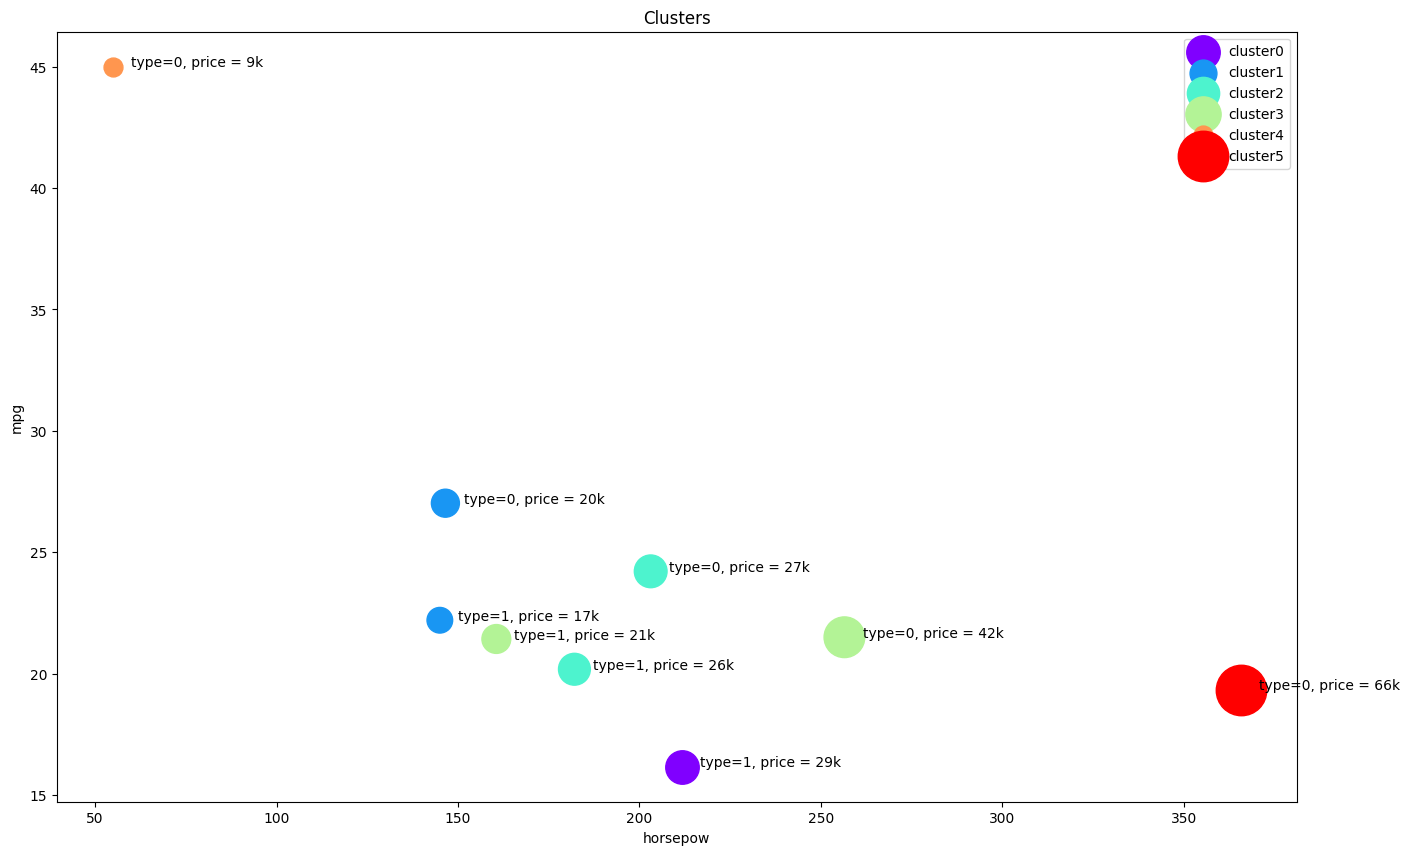

In [40]:
# Membuat objek gambar (figure) dengan ukuran 16x10.
plt.figure(figsize=(16, 10))

# Visualisasi Setiap Klaster
for color, label in zip(colors, cluster_labels):
  subset = agg_cars.loc[(label,),]
  for i in subset.index:
    plt.text(subset.loc[i][0] + 5, subset.loc[i][2], 'type=' + str(int(i)) + ', price = ' + str(int(subset.loc[i][3])) + 'k')
  plt.scatter(subset.horsepow, subset.mpg, s = subset.price*20, c = color, label = 'cluster' + str(label))

# Penyusunan Legenda dan Label Grafik
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

##3. Lakukan agglomerative clustering menggunakan scipy dan scikit-learn dengan single linkage, average linkage, dan complete linkage untuk dataset masing-masing! Jelaskan perbedaannya!

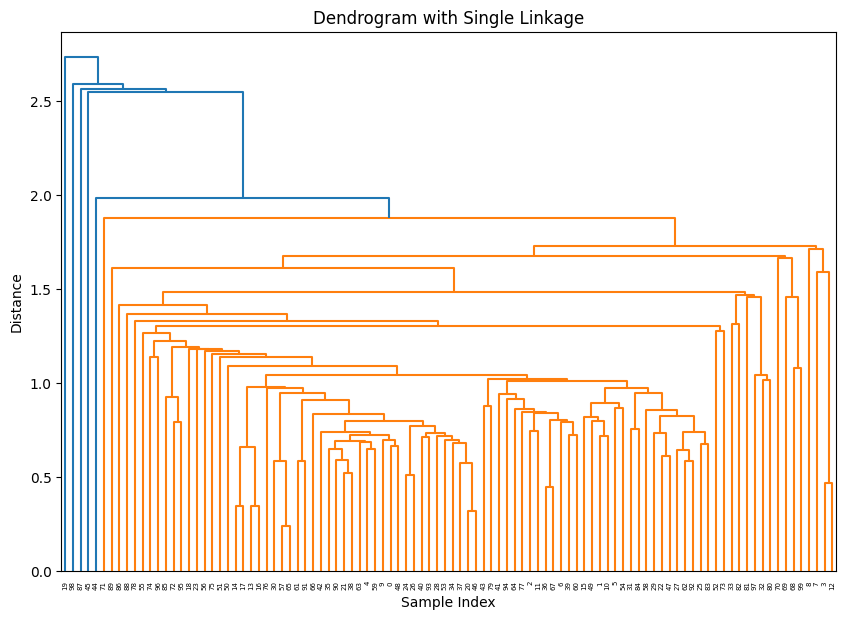

In [42]:
# Mengambil subset data untuk visualisasi (100 sampel pertama)
X_subset = X_scaled[:100]

# Single Linkage
linkage_single = linkage(X_subset, method='single')
plot_dendrogram(linkage_single, 'Dendrogram with Single Linkage')

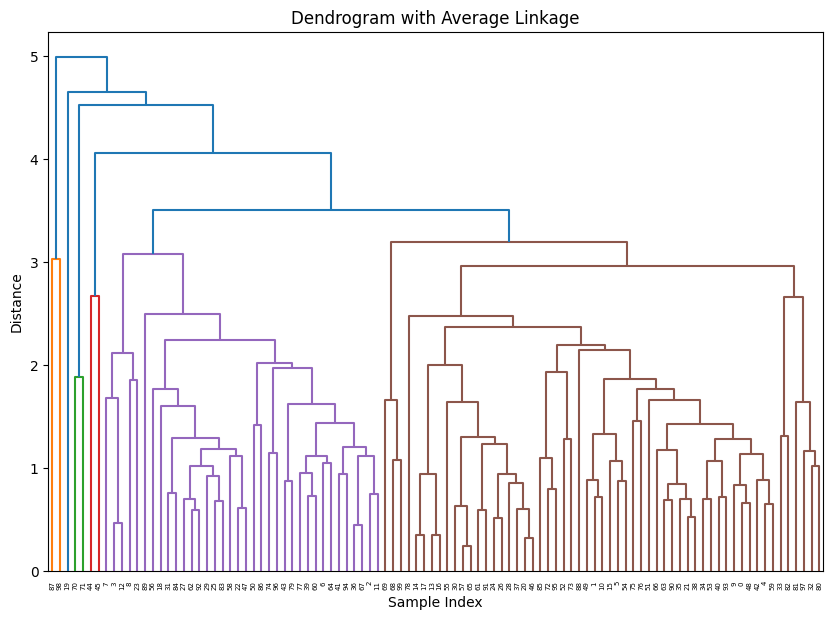

In [43]:
# Average Linkage
linkage_average = linkage(X_subset, method='average')
plot_dendrogram(linkage_average, 'Dendrogram with Average Linkage')

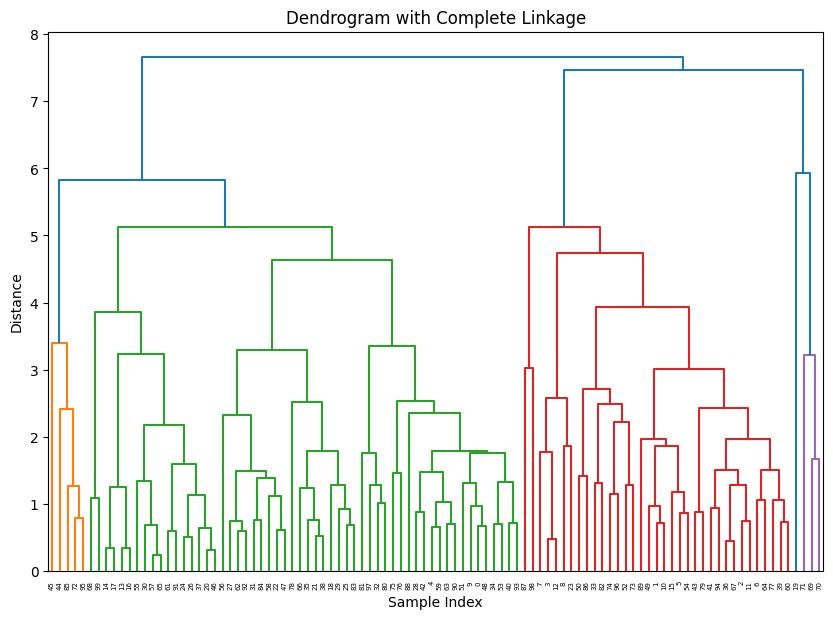

In [44]:
# Complete Linkage
linkage_complete = linkage(X_subset, method='complete')
plot_dendrogram(linkage_complete, 'Dendrogram with Complete Linkage')

**Perbedaan:**

* Single Linkage: Metode ini mengukur jarak antara dua cluster berdasarkan pasangan titik terdekat di antara keduanya. Pendekatan ini sering menghasilkan cluster yang "berantai" (chaining effect), di mana cluster yang terbentuk cenderung memanjang karena hanya jarak minimum yang dipertimbangkan.

* Average Linkage: Menghitung jarak antara dua cluster sebagai rata-rata jarak dari semua pasangan titik antar cluster. Metode ini memberikan hasil yang lebih seimbang dan stabil dibandingkan single linkage, membuatnya cocok untuk data dengan distribusi yang bervariasi.

* Complete Linkage: Menentukan jarak antar cluster berdasarkan pasangan titik terjauh di antara mereka. Dengan pendekatan ini, cluster yang terbentuk biasanya lebih kompak, homogen, dan memiliki ukuran yang serupa, sehingga cocok untuk data dengan batasan cluster yang jelas.

In [64]:
# Membandingkan hasil clustering dengan n_clusters=4
def perform_clustering(X, method, n_clusters=4):
    clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)
    labels = clustering.fit_predict(X)
    return labels

# Lakukan clustering dengan ketiga metode
single_labels = perform_clustering(X_scaled, 'single')
average_labels = perform_clustering(X_scaled, 'average')
complete_labels = perform_clustering(X_scaled, 'complete')

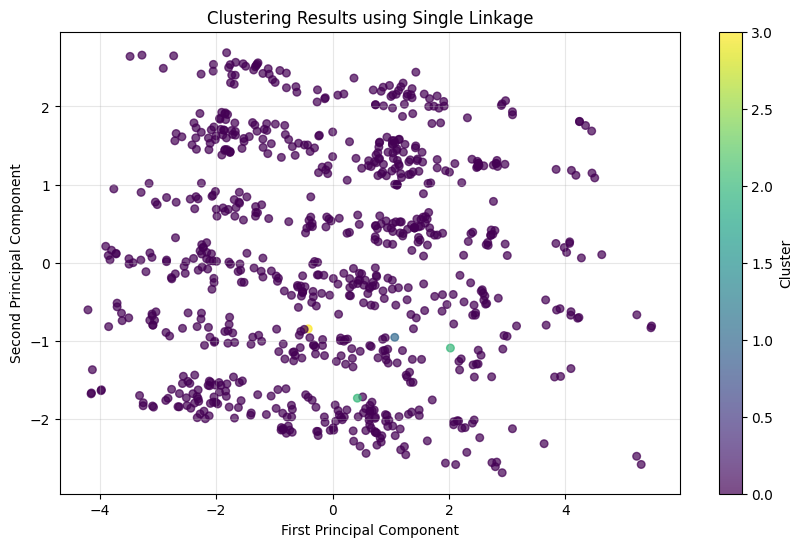

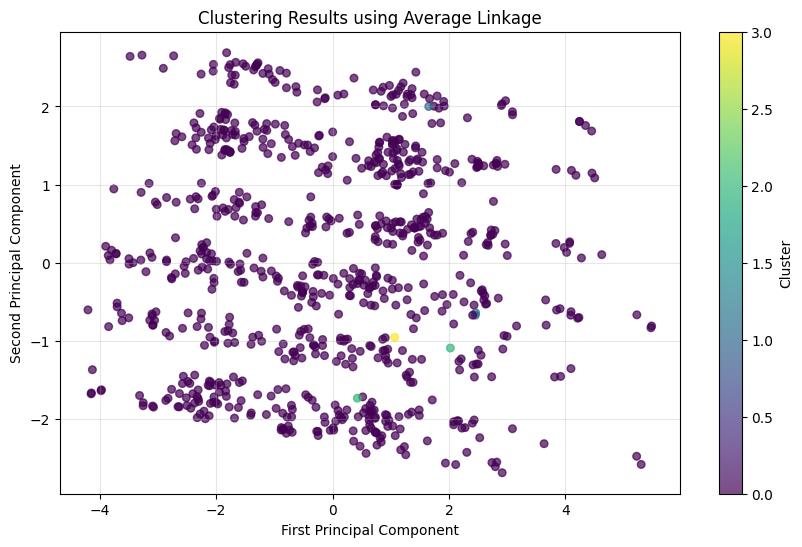

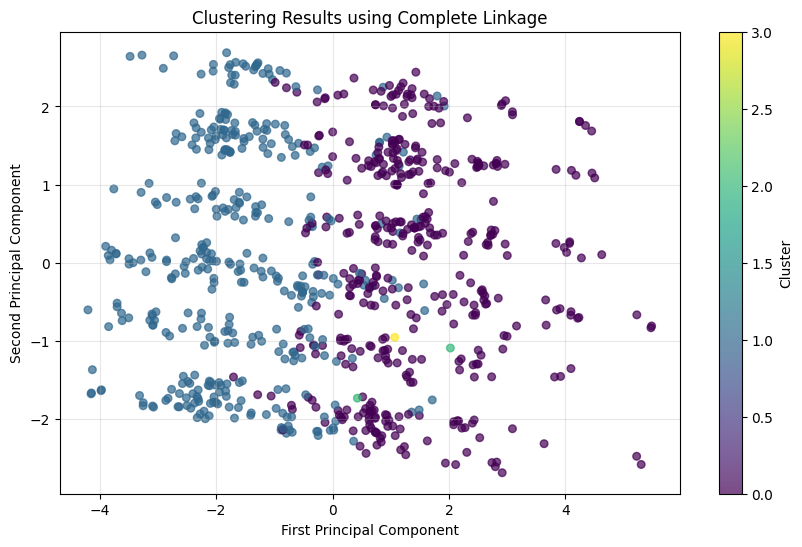


Analisis Perbandingan Metode Clustering:
----------------------------------------

Single Linkage:
Silhouette Score: 0.345

Ukuran cluster untuk Single Linkage:
Cluster 0: 796 sampel (99.50%)
Cluster 1: 1 sampel (0.12%)
Cluster 2: 2 sampel (0.25%)
Cluster 3: 1 sampel (0.12%)

Average Linkage:
Silhouette Score: 0.289

Ukuran cluster untuk Average Linkage:
Cluster 0: 794 sampel (99.25%)
Cluster 1: 3 sampel (0.38%)
Cluster 2: 2 sampel (0.25%)
Cluster 3: 1 sampel (0.12%)

Complete Linkage:
Silhouette Score: 0.227

Ukuran cluster untuk Complete Linkage:
Cluster 0: 415 sampel (51.88%)
Cluster 1: 382 sampel (47.75%)
Cluster 2: 2 sampel (0.25%)
Cluster 3: 1 sampel (0.12%)

Perbandingan Silhouette Score:
Single Linkage: 0.345
Average Linkage: 0.289
Complete Linkage: 0.227


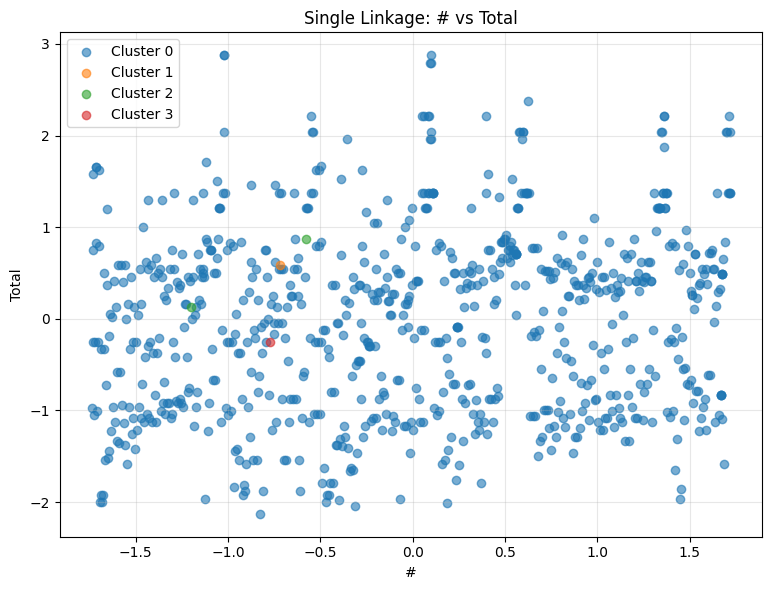

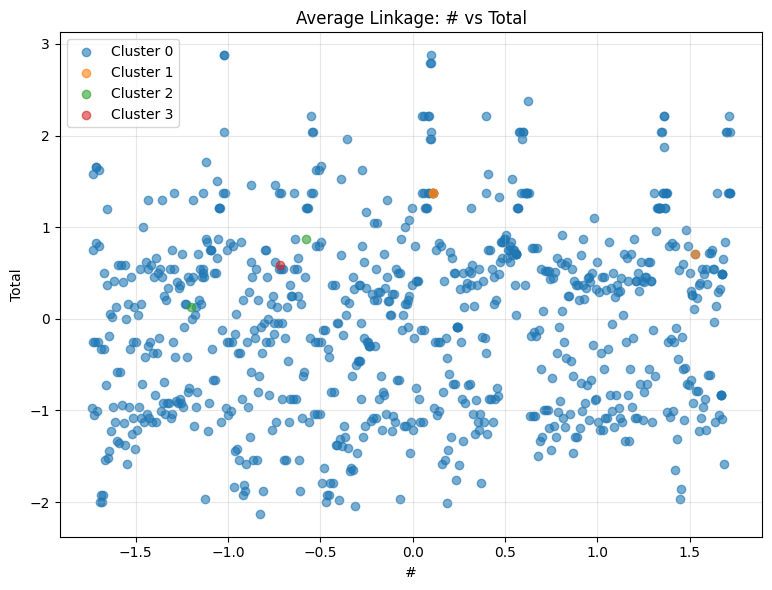

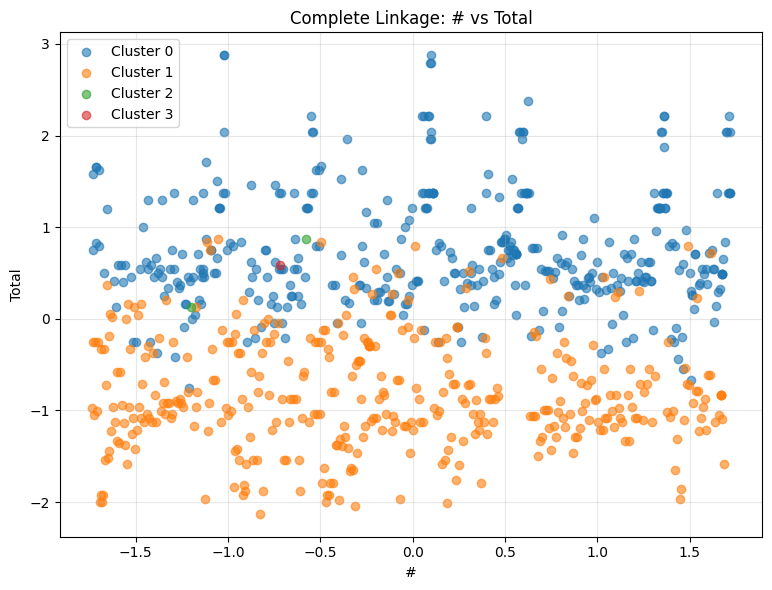

In [65]:
# Fungsi untuk visualisasi hasil clustering menggunakan PCA
def visualize_clusters(X, labels, title):
    # Reduksi dimensi menggunakan PCA untuk visualisasi
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # Plot hasil
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=30, alpha=0.7)
    plt.colorbar(scatter, label='Cluster')
    plt.title(f'Clustering Results using {title}')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.grid(alpha=0.3)
    plt.show()

# Visualisasi hasil clustering untuk setiap metode
visualize_clusters(X_scaled, single_labels, 'Single Linkage')
visualize_clusters(X_scaled, average_labels, 'Average Linkage')
visualize_clusters(X_scaled, complete_labels, 'Complete Linkage')

# Analisis ukuran cluster
def analyze_cluster_sizes(labels, method_name):
    cluster_sizes = Counter(labels)
    print(f"\nUkuran cluster untuk {method_name}:")
    for cluster_id, size in sorted(cluster_sizes.items()):
        print(f"Cluster {cluster_id}: {size} sampel ({size/len(labels)*100:.2f}%)")

# Hitung dan tampilkan metrik evaluasi
print("\nAnalisis Perbandingan Metode Clustering:")
print("----------------------------------------")

results = []

for labels, method in zip([single_labels, average_labels, complete_labels],
                        ['Single Linkage', 'Average Linkage', 'Complete Linkage']):
    # Hitung Silhouette Score
    silhouette_avg = silhouette_score(X_scaled, labels)
    results.append((method, silhouette_avg))
    print(f"\n{method}:")
    print(f"Silhouette Score: {silhouette_avg:.3f}")

    # Analisis ukuran cluster
    analyze_cluster_sizes(labels, method)

# Tampilkan hasil perbandingan silhouette score
print("\nPerbandingan Silhouette Score:")
for method, score in sorted(results, key=lambda x: x[1], reverse=True):
    print(f"{method}: {score:.3f}")

# Visualisasi perbandingan distribusi fitur antar cluster
def plot_feature_distributions(X, labels, method_name):
    plt.figure(figsize=(15, 6))

    # Pilih dua fitur untuk visualisasi
    feature_pairs = [(numeric_features[0], numeric_features[1])]  # Ambil dua fitur pertama secara otomatis

    for idx, (feat1, feat2) in enumerate(feature_pairs, 1):
        plt.subplot(1, 2, idx)
        for cluster in np.unique(labels):
            mask = labels == cluster
            plt.scatter(X[mask, numeric_features.get_loc(feat1)],
                        X[mask, numeric_features.get_loc(feat2)],
                        label=f'Cluster {cluster}',
                        alpha=0.6)
        plt.xlabel(feat1)
        plt.ylabel(feat2)
        plt.title(f'{method_name}: {feat1} vs {feat2}')
        plt.legend()
        plt.grid(alpha=0.3)

    plt.tight_layout()
    plt.show()

# Visualisasi distribusi fitur untuk setiap metode
plot_feature_distributions(X_scaled, single_labels, 'Single Linkage')
plot_feature_distributions(X_scaled, average_labels, 'Average Linkage')
plot_feature_distributions(X_scaled, complete_labels, 'Complete Linkage')


##4. ⁠Lakukan Principal Component Analysis untuk dataset!

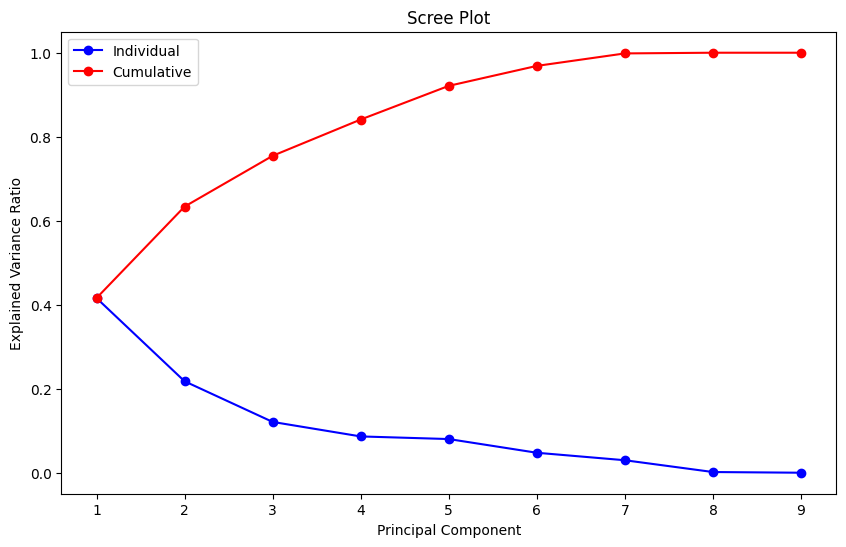


Kontribusi variansi dari setiap komponen utama:
PC1: 0.4159 (41.59%)
PC2: 0.2177 (21.77%)
PC3: 0.1209 (12.09%)
PC4: 0.0864 (8.64%)
PC5: 0.0802 (8.02%)
PC6: 0.0475 (4.75%)
PC7: 0.0297 (2.97%)
PC8: 0.0016 (0.16%)
PC9: 0.0000 (0.00%)


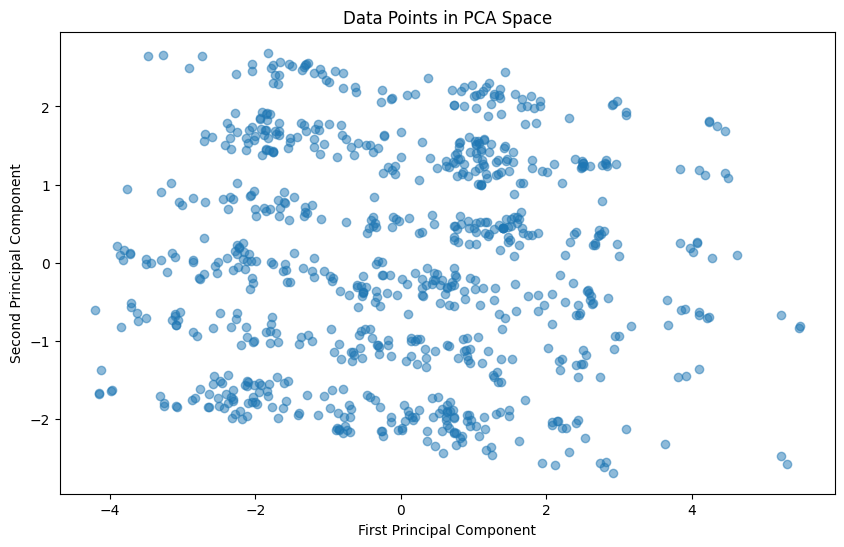


Loading factors (koefisien komponen utama):
                 PC1       PC2       PC3       PC4       PC5       PC6  \
#           0.110931  0.693692  0.048561 -0.026116 -0.019477 -0.014804   
Total       0.514146 -0.069191  0.003546  0.008402 -0.035329 -0.004904   
HP          0.327893 -0.011699 -0.082421  0.457716  0.738469 -0.215196   
Attack      0.375556 -0.033761  0.010922  0.598966 -0.380151  0.193430   
Defense     0.311736 -0.006138 -0.634625 -0.057512 -0.406754 -0.056167   
Sp. Atk     0.386264 -0.063966  0.299471 -0.314466  0.153191  0.736391   
Sp. Def     0.376438 -0.049812 -0.249537 -0.567928  0.190384 -0.298557   
Speed       0.284924 -0.111322  0.657604 -0.076814 -0.288467 -0.530205   
Generation  0.074330  0.702655  0.059773 -0.018551 -0.012034 -0.018775   

                 PC7       PC8           PC9  
#          -0.001138  0.709116  1.730927e-15  
Total      -0.031275 -0.013801  8.534297e-01  
HP         -0.226724 -0.001922 -1.816563e-01  
Attack      0.513411 -0.00

In [68]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Hitung explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'bo-')
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'ro-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.legend(['Individual', 'Cumulative'])
plt.show()

# Tampilkan hasil komponen utama pertama
print("\nKontribusi variansi dari setiap komponen utama:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.4f} ({ratio*100:.2f}%)")

# Visualisasi data dalam ruang PCA (2 komponen pertama)
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Data Points in PCA Space')
plt.show()

# Tampilkan loading factors
components_df = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(len(pca.components_))],
    index=numeric_features
)
print("\nLoading factors (koefisien komponen utama):")
print(components_df)